In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("datasets/Breast_Cancer.csv")
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


In [7]:
# Print the number of unique values for each column
for col in df.columns:
    print(f'{col} has {df[col].nunique()} values')

Age has 40 values
Race has 3 values
Marital Status has 5 values
T Stage  has 4 values
N Stage has 3 values
6th Stage has 5 values
differentiate has 4 values
Grade has 4 values
A Stage has 2 values
Tumor Size has 110 values
Estrogen Status has 2 values
Progesterone Status has 2 values
Regional Node Examined has 54 values
Reginol Node Positive has 38 values
Survival Months has 107 values
Status has 2 values


In [8]:
# Classify columns: categorical columns and numerical columns
# Categorical columns: if the number of unique values is 5 or fewer
cat_cols = [col for col in df.columns if df[col].nunique() <= 5]
# Numerical columns: if the number of unique values is 6 or more
num_cols = [col for col in df.columns if df[col].nunique() >= 6]

print(f"number of categorical columns: {len(cat_cols)}")
print(f"number of numerical columns: {len(num_cols)}")

number of categorical columns: 11
number of numerical columns: 5


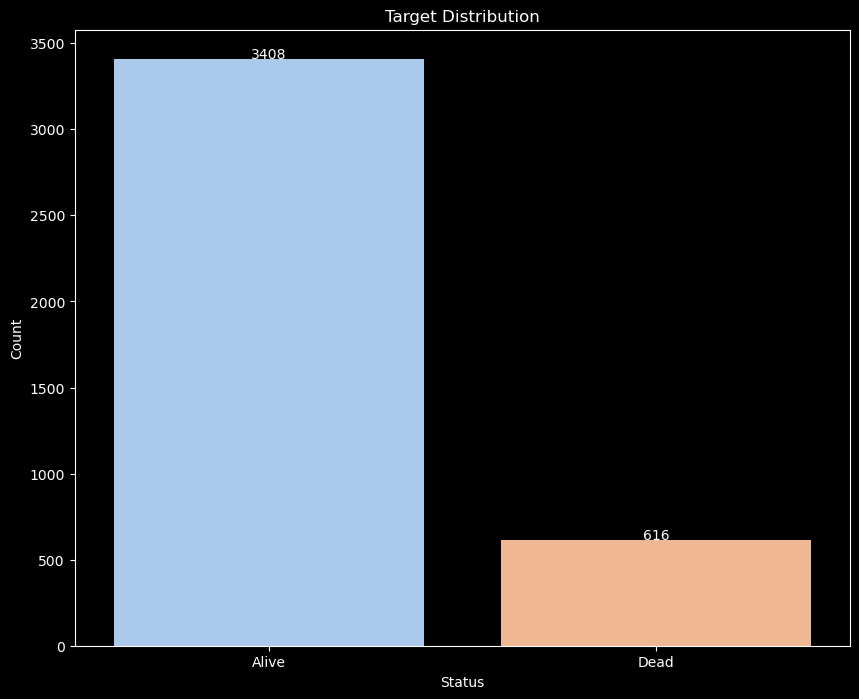

In [9]:
# Target distribution
# Set the figure size and create a count plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Status', data=df, palette='pastel')

# Add labels to each bar in the plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, f'{int(p.get_height())}', ha="center")

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

In [10]:
# View the specific values in the categorical columns
for col in cat_cols:
    print(f'{col} has {df[col].unique()} values')

Race has ['White' 'Black' 'Other'] values
Marital Status has ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated'] values
T Stage  has ['T1' 'T2' 'T3' 'T4'] values
N Stage has ['N1' 'N2' 'N3'] values
6th Stage has ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB'] values
differentiate has ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated'] values
Grade has ['3' '2' '1' ' anaplastic; Grade IV'] values
A Stage has ['Regional' 'Distant'] values
Estrogen Status has ['Positive' 'Negative'] values
Progesterone Status has ['Positive' 'Negative'] values
Status has ['Alive' 'Dead'] values


In [11]:
# Clean 'Marital Status' column by removing extra spaces
df['Marital Status'] = df['Marital Status'].str.strip()

# Rename 'Grade' column values
df['Grade'] = df['Grade'].replace({
    '3': 'Grade III', 
    '2': 'Grade II', 
    '1': 'Grade I', 
    ' anaplastic; Grade IV': 'Grade IV'
})

# Rename 'differentiate' column values for better visualization
df['differentiate'] = df['differentiate'].replace({
    'Poorly differentiated': 'Poor',
    'Moderately differentiated': 'Moderate',
    'Well differentiated': 'Well',
    'Undifferentiated': 'Undiff'
})

In [12]:
# View the specific values in the categorical columns
for col in cat_cols:
    print(f'{col} has {df[col].unique()} values')

Race has ['White' 'Black' 'Other'] values
Marital Status has ['Married' 'Divorced' 'Single' 'Widowed' 'Separated'] values
T Stage  has ['T1' 'T2' 'T3' 'T4'] values
N Stage has ['N1' 'N2' 'N3'] values
6th Stage has ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB'] values
differentiate has ['Poor' 'Moderate' 'Well' 'Undiff'] values
Grade has ['Grade III' 'Grade II' 'Grade I' 'Grade IV'] values
A Stage has ['Regional' 'Distant'] values
Estrogen Status has ['Positive' 'Negative'] values
Progesterone Status has ['Positive' 'Negative'] values
Status has ['Alive' 'Dead'] values


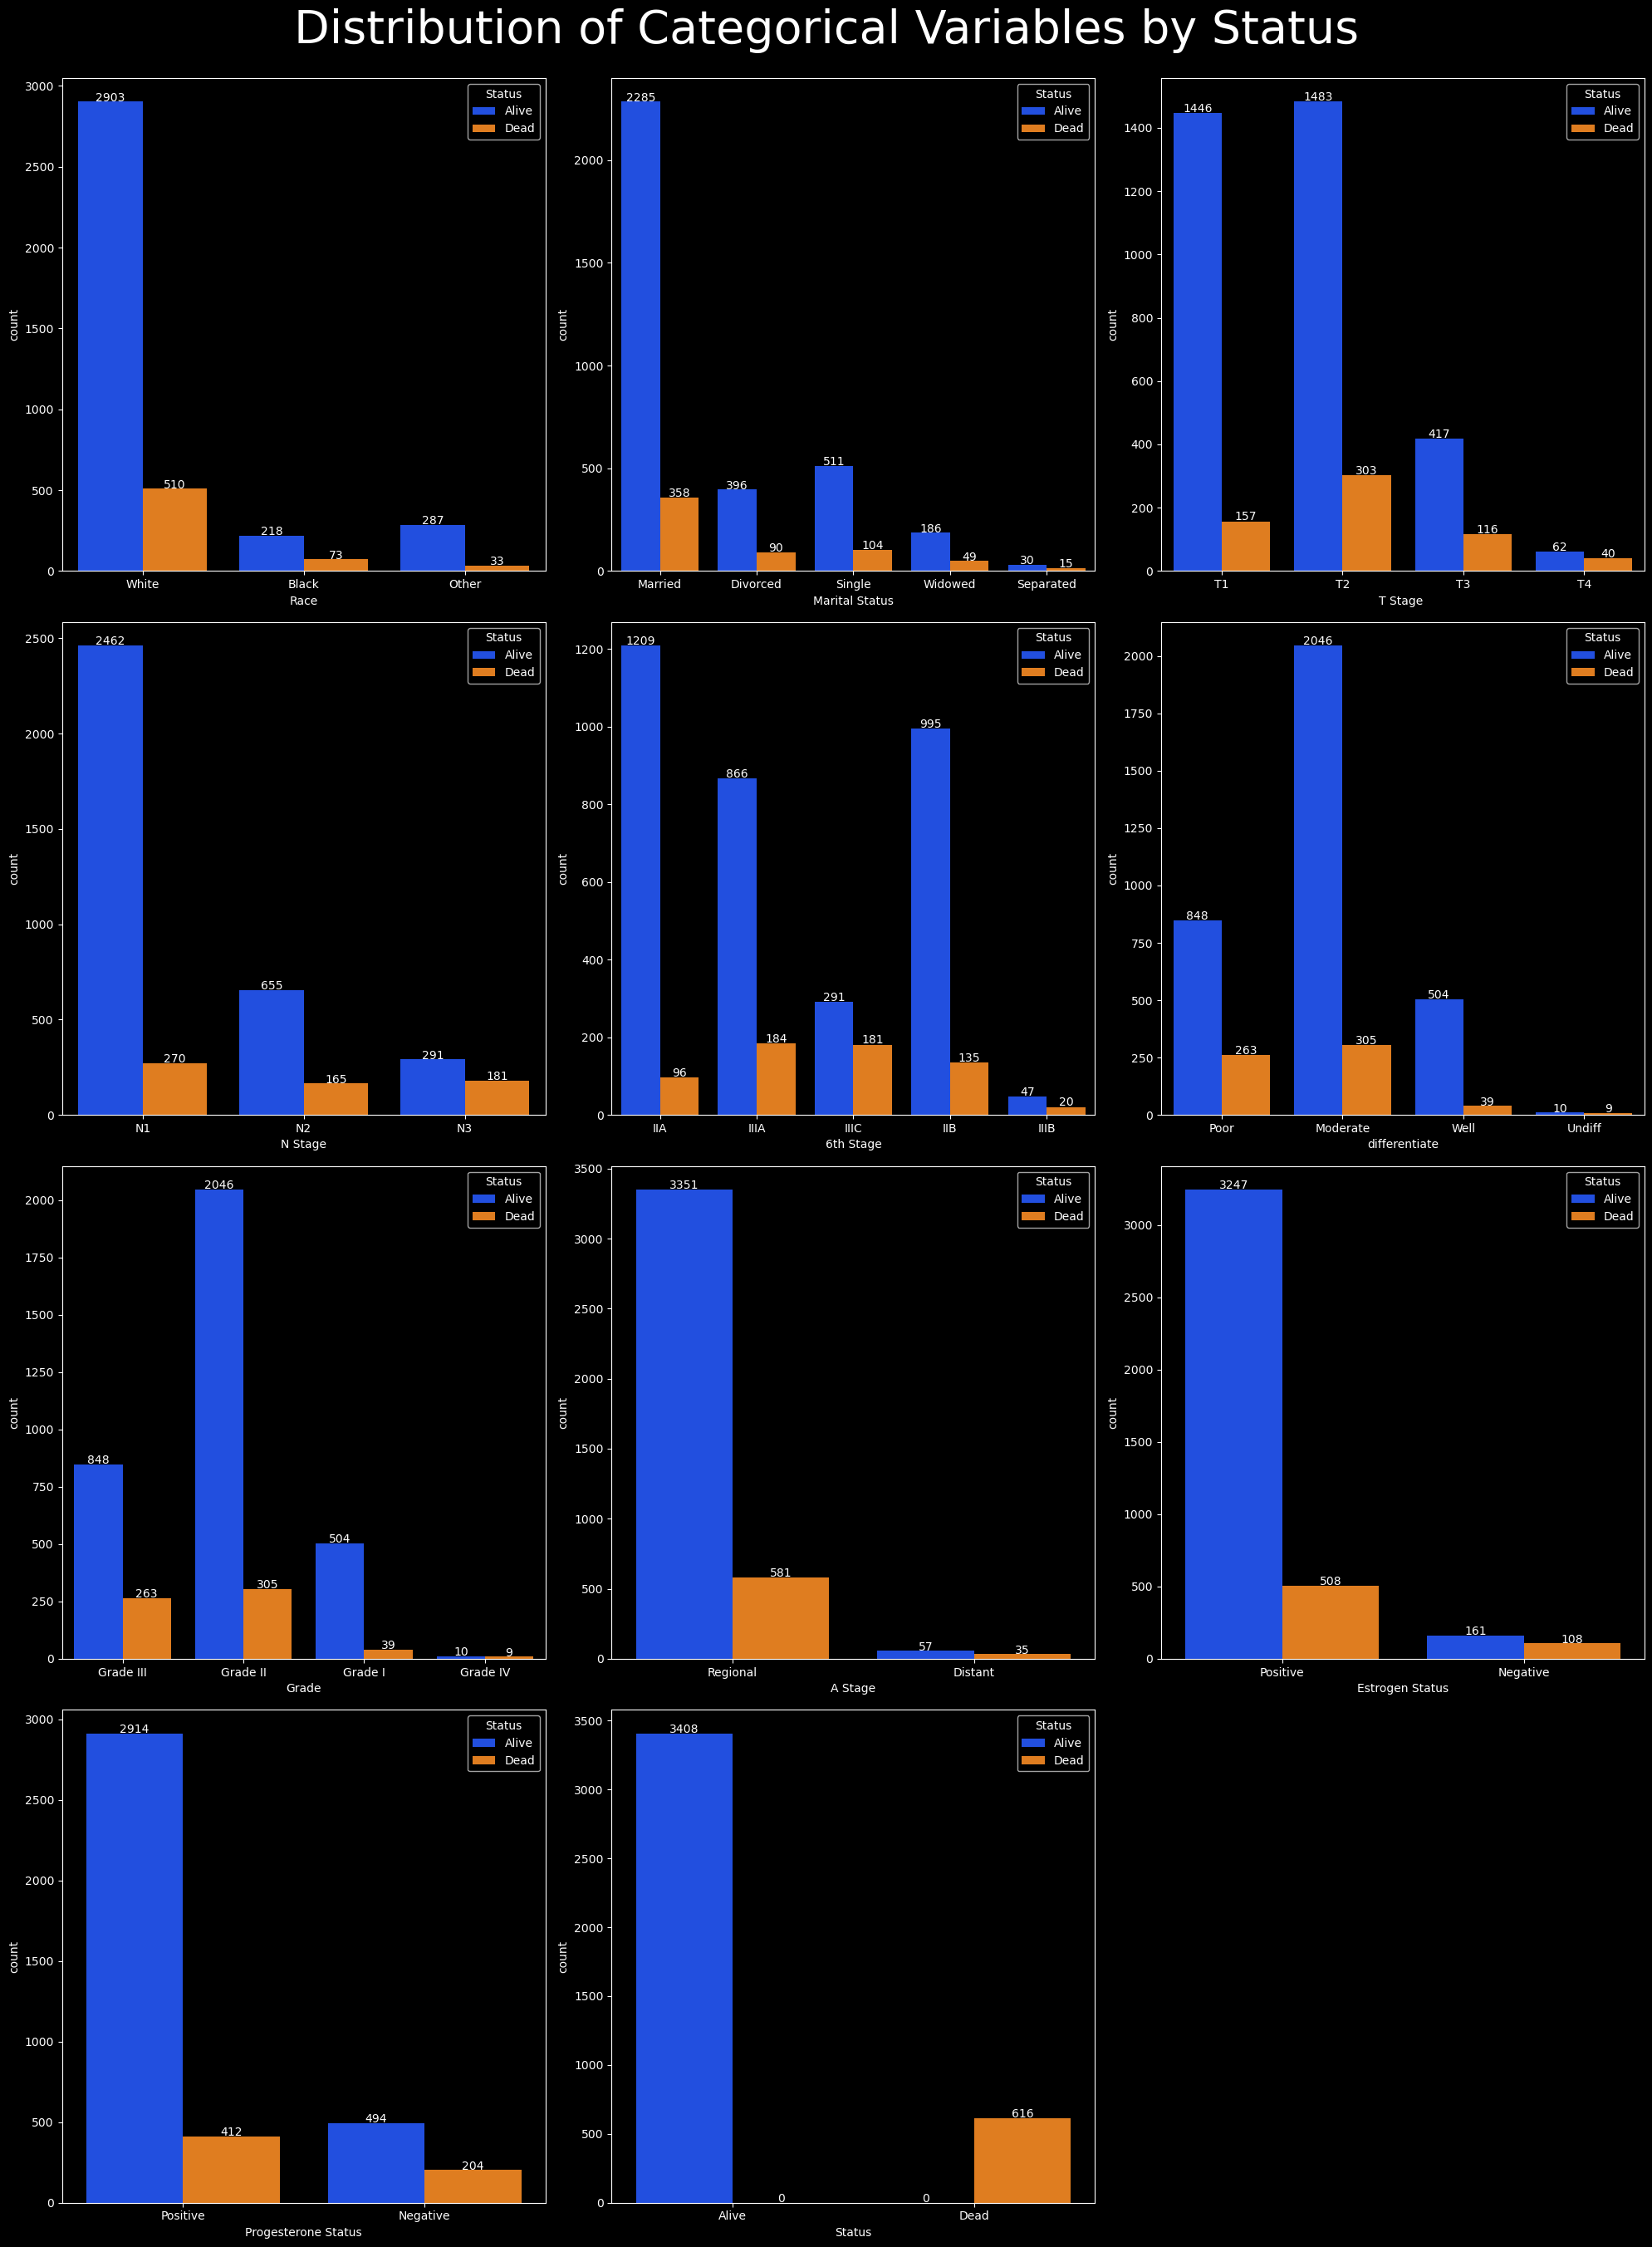

In [13]:
plt.figure(figsize=(20, 27))

# Loop through each column in the dataframe
for i, col in enumerate(cat_cols):
    plt.subplot(4, 3, i+1)
    ax = sns.countplot(x=df[col], hue=df['Status'], palette='bright')
        
    # Add labels to each bar in the plot
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, f'{int(p.get_height())}', ha="center")
            

plt.suptitle('Distribution of Categorical Variables by Status', fontsize=40, y=1)
plt.tight_layout()
plt.show()

/Users/aspisov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aspisov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aspisov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aspisov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1

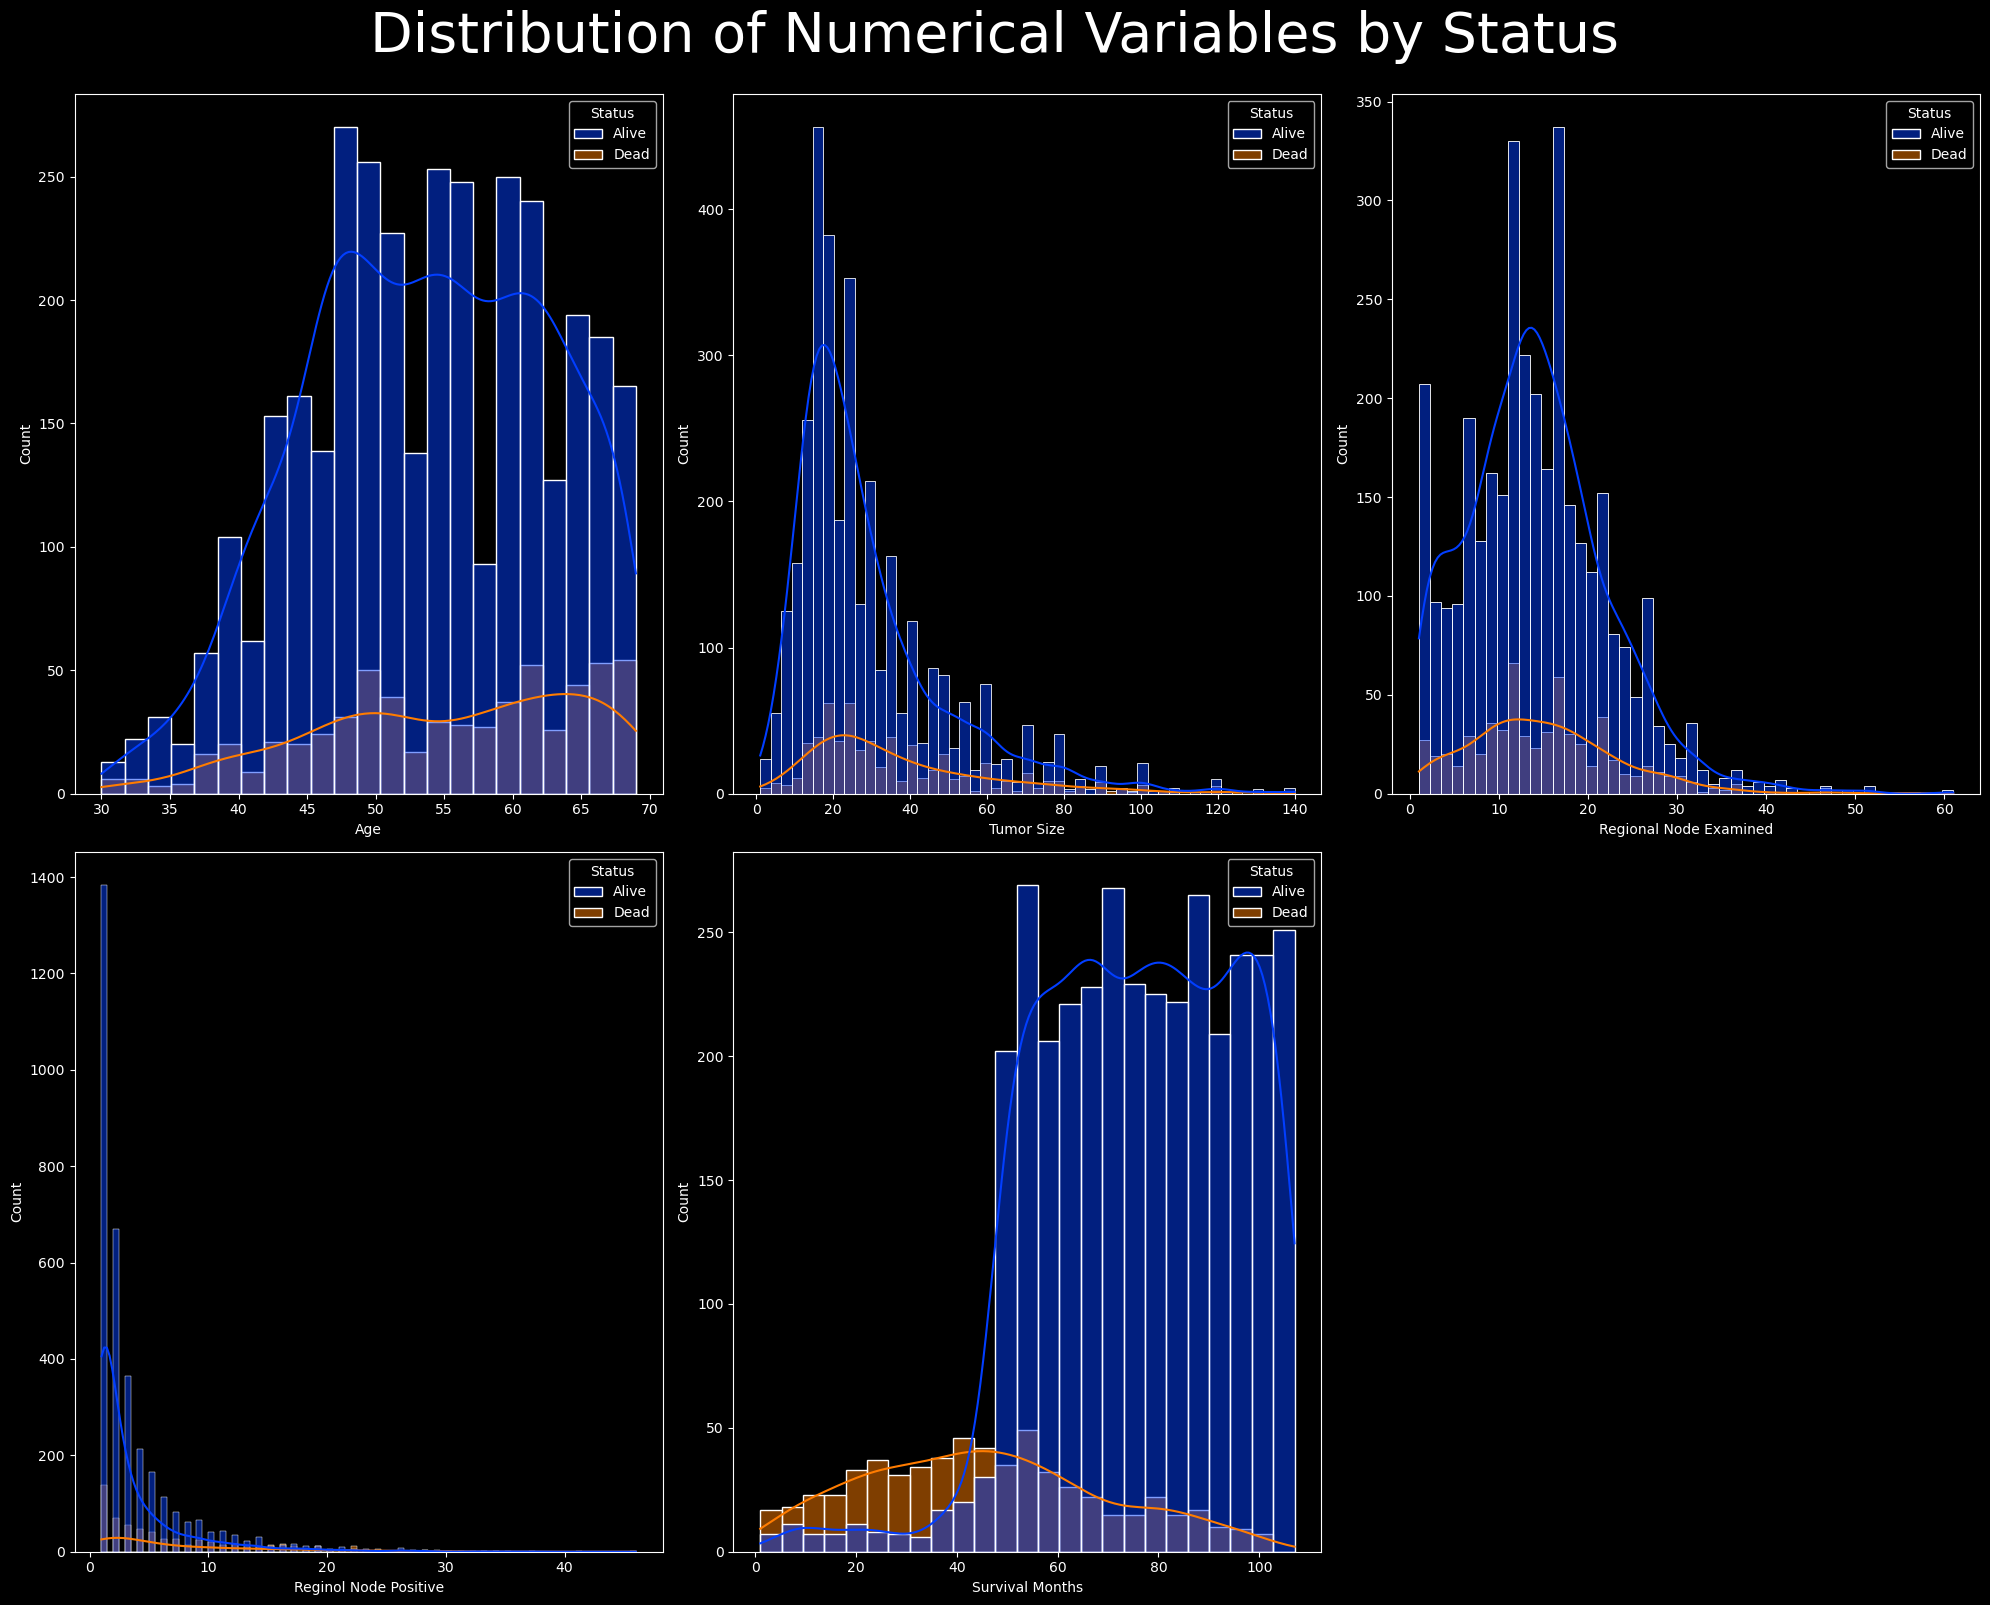

In [14]:
plt.figure(figsize=(20, 16))
plotnumber = 1

# Loop through each column in the dataframe
for col in num_cols:
    plt.subplot(2, 3, plotnumber)
    sns.histplot(data=df, x=col, hue='Status', kde=True, palette='bright')  # Use 'hue' to differentiate by target
    plt.xlabel(col)
    plotnumber += 1

# Set the main title and adjust layout
plt.suptitle('Distribution of Numerical Variables by Status', fontsize=40, y=1)
plt.tight_layout()
plt.show();

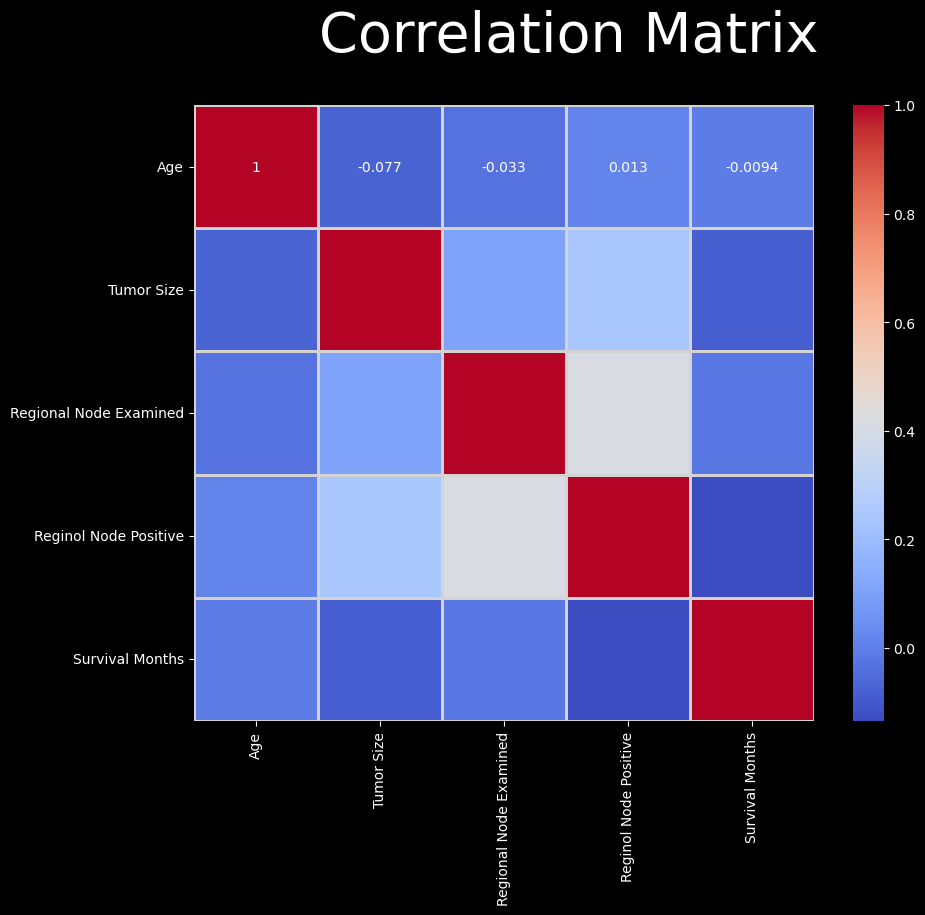

In [15]:
# Correlation matrix
plt.figure(figsize=(10, 8))

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

In [16]:
# Feature encoding (label encoding)
# Convert categories to numeric values ​​using category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,2,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,1,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,1,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,2,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,2,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,1,1,9,1,1,1,1,49,0
4020,56,2,0,1,1,2,0,1,1,46,1,1,14,8,69,0
4021,68,2,1,1,0,1,0,1,1,22,1,0,11,3,69,0
4022,58,0,0,1,0,1,0,1,1,44,1,1,11,1,72,0


In [17]:
X = df.drop('Status', axis=1).to_numpy()
y = df['Status'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X

array([[ 68,   2,   1, ...,  24,   1,  60],
       [ 50,   2,   1, ...,  14,   5,  62],
       [ 58,   2,   0, ...,  14,   7,  75],
       ...,
       [ 68,   2,   1, ...,  11,   3,  69],
       [ 58,   0,   0, ...,  11,   1,  72],
       [ 46,   2,   1, ...,   7,   2, 100]])

In [20]:
from models.decision_tree import ClassificationTree
from helper.metrics import accuracy, precision, recall, f1_score

model = ClassificationTree(max_depth=10)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(
    f"Accuracy: {accuracy(y_test, y_pred) * 100:.2f}%",
    f"Precision: {precision(y_test, y_pred) * 100:.2f}%",
    f"Recall: {recall(y_test, y_pred) * 100:.2f}%",
    f"F1 Score: {f1_score(y_test, y_pred) * 100:.2f}%",
    sep="\n")

Accuracy: 87.95%
Precision: 61.62%
Recall: 50.83%
F1 Score: 55.71%
